In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style("whitegrid")  
%matplotlib inline

kernel_sizes = [2,3,4,5,6,7,8]
kernel_num = [10,20,50,100,150,200,250,300]
ks = pd.DataFrame(np.random.rand(7,8), index = kernel_sizes, columns = [['spark_acc','mapreduce_acc','hadoop_acc','hdfs_acc','spark_f1','mapreduce_f1','hadoop_f1','hdfs_f1']]).fillna(0)
kn = pd.DataFrame(np.random.rand(8,8), index = kernel_num, columns = [['spark_acc','mapreduce_acc','hadoop_acc','hdfs_acc','spark_f1','mapreduce_f1','hadoop_f1','hdfs_f1']]).fillna(0)

In [125]:
kn

,spark_acc,mapreduce_acc,hadoop_acc,hdfs_acc,spark_f1,mapreduce_f1,hadoop_f1,hdfs_f1
10,0.115981,0.913179,0.153754,0.508454,0.884960,0.884090,0.005632,0.284966
20,0.185234,0.889989,0.314696,0.666851,0.006039,0.276528,0.450770,0.263764
50,0.332679,0.987824,0.597079,0.634912,0.373513,0.677966,0.020632,0.941857
100,0.141125,0.229556,0.581750,0.936428,0.149940,0.481410,0.762502,0.209671
150,0.932679,0.899967,0.769049,0.799172,0.511766,0.364042,0.596711,0.949078
200,0.631087,0.263240,0.942166,0.225348,0.296492,0.306068,0.474394,0.003408
250,0.507536,0.227170,0.395404,0.528415,0.291662,0.330309,0.229624,0.950775
300,0.407582,0.506390,0.171111,0.063268,0.698272,0.431502,0.079327,0.936493


In [126]:
ks

,spark_acc,mapreduce_acc,hadoop_acc,hdfs_acc,spark_f1,mapreduce_f1,hadoop_f1,hdfs_f1
2,0.156984,0.775300,0.799939,0.873923,0.000175,0.494529,0.229428,0.869427
3,0.634363,0.156072,0.348277,0.242678,0.551377,0.005641,0.598335,0.079912
4,0.326314,0.400875,0.278935,0.952867,0.021185,0.763658,0.099060,0.838732
5,0.008013,0.952649,0.326842,0.267917,0.110486,0.057160,0.680785,0.107540
6,0.936357,0.507436,0.330048,0.304918,0.120753,0.704005,0.481062,0.903530
7,0.493749,0.004656,0.665820,0.466827,0.973250,0.401431,0.165985,0.385844
8,0.851742,0.149635,0.810460,0.840888,0.508987,0.855630,0.199367,0.982603


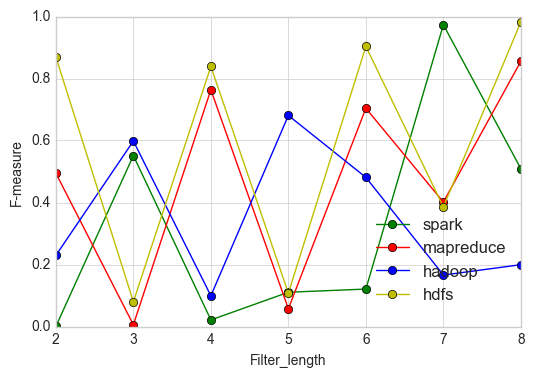

In [127]:
fig1, ax_lst = plt.subplots(1,1)
ks['spark_f1'].plot(style='-o',color='g')
ks['mapreduce_f1'].plot(style='-o',color='r')
ks['hadoop_f1'].plot(style='-o',color='b')
ks['hdfs_f1'].plot(style='-o',color='y')
ax_lst.set_xlabel('Filter_length')
ax_lst.set_ylabel('F-measure')
ax_lst.legend(bbox_to_anchor=(1.0, 0.4),labels = ['spark', 'mapreduce', 'hadoop', 'hdfs'])
fig1.savefig('f1_filterlength.pdf')

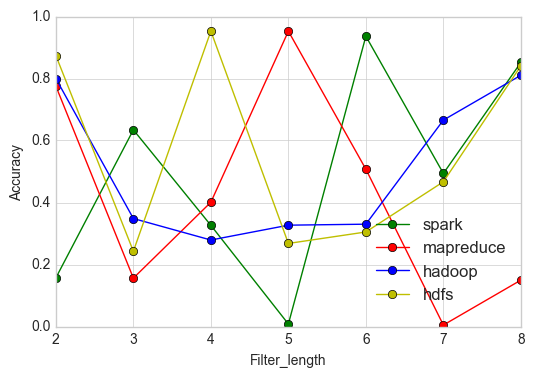

In [128]:
fig1, ax_lst = plt.subplots(1,1)
ks['spark_acc'].plot(style='-o',color='g')
ks['mapreduce_acc'].plot(style='-o',color='r')
ks['hadoop_acc'].plot(style='-o',color='b')
ks['hdfs_acc'].plot(style='-o',color='y')
ax_lst.set_xlabel('Filter_length')
ax_lst.set_ylabel('Accuracy')
ax_lst.legend(bbox_to_anchor=(1.0, 0.4), labels = ['spark', 'mapreduce', 'hadoop', 'hdfs'])
fig1.savefig('acc_filterlength.pdf')

# 横坐标不等距

In [129]:
kn_bp = kn.copy(deep=True)
kn['step'] = kn.index
kn.index = kn['step']
kn = kn.reset_index(drop=True)
kn

,spark_acc,mapreduce_acc,hadoop_acc,hdfs_acc,spark_f1,mapreduce_f1,hadoop_f1,hdfs_f1,step
0,0.115981,0.913179,0.153754,0.508454,0.884960,0.884090,0.005632,0.284966,10
1,0.185234,0.889989,0.314696,0.666851,0.006039,0.276528,0.450770,0.263764,20
2,0.332679,0.987824,0.597079,0.634912,0.373513,0.677966,0.020632,0.941857,50
3,0.141125,0.229556,0.581750,0.936428,0.149940,0.481410,0.762502,0.209671,100
4,0.932679,0.899967,0.769049,0.799172,0.511766,0.364042,0.596711,0.949078,150
5,0.631087,0.263240,0.942166,0.225348,0.296492,0.306068,0.474394,0.003408,200
6,0.507536,0.227170,0.395404,0.528415,0.291662,0.330309,0.229624,0.950775,250
7,0.407582,0.506390,0.171111,0.063268,0.698272,0.431502,0.079327,0.936493,300


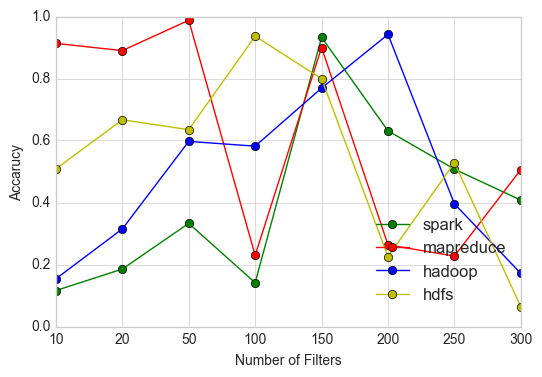

In [130]:
fig1, ax_lst = plt.subplots(1,1)
kn['spark_acc'].plot(style='-o',color='g')
kn['mapreduce_acc'].plot(style='-o',color='r')
kn['hadoop_acc'].plot(style='-o',color='b')
kn['hdfs_acc'].plot(style='-o',color='y')
ax_lst.set_xlabel('Number of Filters')
ax_lst.set_ylabel('Accarucy')
ax_lst.legend(bbox_to_anchor=(1.0, 0.4), labels = ['spark', 'mapreduce', 'hadoop', 'hdfs'])
ax_lst.set_xticklabels(str(i) for i in list(kn.step)) 
fig1.savefig('acc_filter_num.pdf')

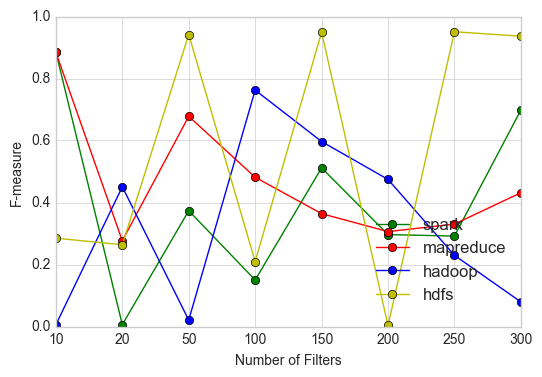

In [131]:
fig1, ax_lst = plt.subplots(1,1)
kn['spark_f1'].plot(style='-o',color='g')
kn['mapreduce_f1'].plot(style='-o',color='r')
kn['hadoop_f1'].plot(style='-o',color='b')
kn['hdfs_f1'].plot(style='-o',color='y')
ax_lst.set_xlabel('Number of Filters')
ax_lst.set_ylabel('F-measure')
ax_lst.legend(bbox_to_anchor=(1.0, 0.4), labels = ['spark', 'mapreduce', 'hadoop', 'hdfs'])
ax_lst.set_xticklabels(str(i) for i in list(kn.step)) 
fig1.savefig('f1_filter_num.pdf')

In [121]:
df_f1=pd.DataFrame(np.random.rand(4,2),index=['spark','hdfs','mapreduce','hadoop'],
             columns=pd.Index(['Combined training set','Separated training set']))
df_acc=pd.DataFrame(np.random.rand(4,2),index=['spark','hdfs','mapreduce','hadoop'],
             columns=pd.Index(['Combined training set','Separated training set']))

df_f1


,Combined training set,Separated training set
spark,0.422668,0.406392
hdfs,0.277834,0.991127
mapreduce,0.507497,0.599113
hadoop,0.480417,0.267686


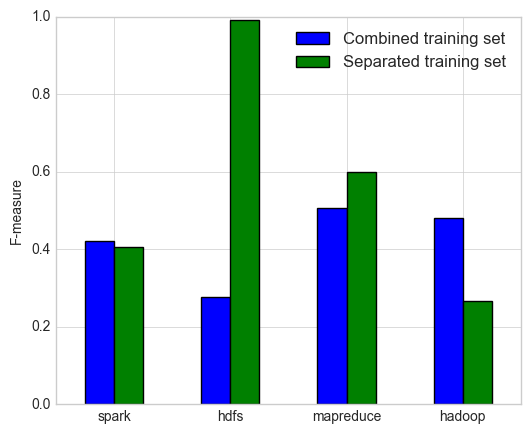

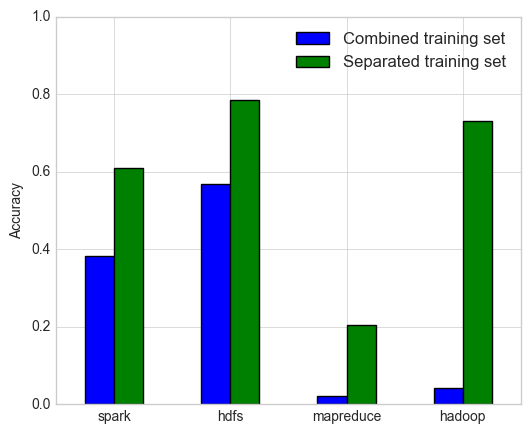

In [122]:
df_f1.plot(kind='bar', use_index = ['spark','hdfs','mapreduce','hadoop'], \
           rot = 360, ylim=(0,1), figsize=(6,5)).set_ylabel('F-measure')
df_acc.plot(kind='bar', use_index = ['spark','hdfs','mapreduce','hadoop'], \
            rot = 360,ylim=(0,1), figsize=(6,5)).set_ylabel('Accuracy')